In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("/drive/notebooks/Task 2/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/lib/python3.13/site-packages/threadpoolctl.py:1123: RuntimeWarning: JsProxy.as_object_map() is deprecated. Use as_py_json() instead.
  for filepath in LDSO.loadedLibsByName.as_object_map():


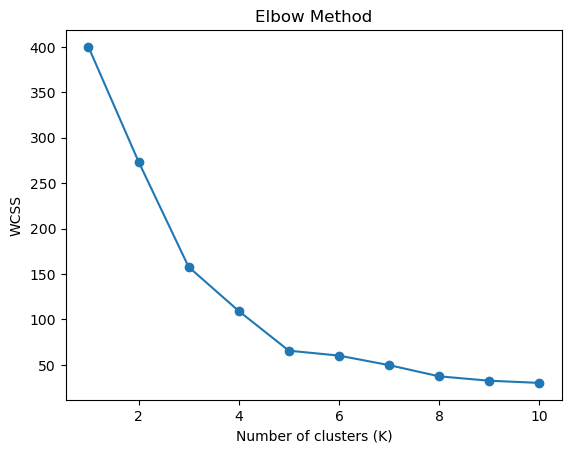

In [7]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


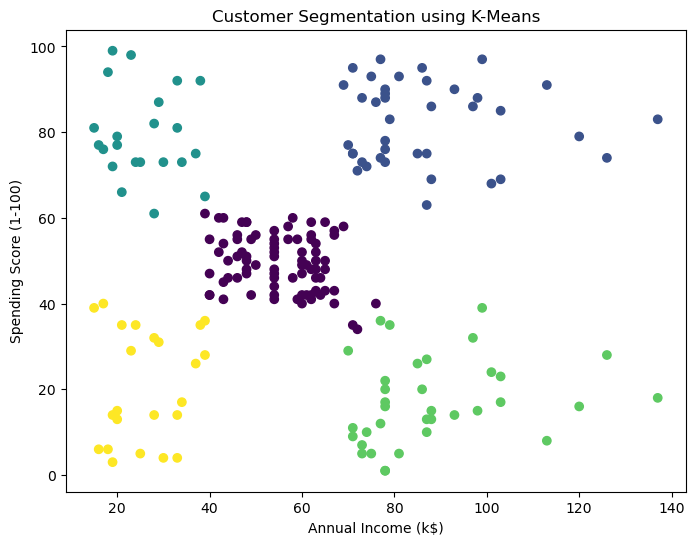

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"]
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.show()
